# **1. Khai báo thư viện cần thiết.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# **2. Upsampling Data.**

Theo quan sát khi thực hiện trực quan hóa dữ liệu, ta có thể thấy được sự mất cân bằng giữa các lớp trong dữ liệu. Vì thế ta sẽ tìm phương pháp để cải thiện việc này.

Trước hết cùng quan sát lại phân bố các lớp trong dữ liệu sau khi tiền xử lý.

In [2]:
df=pd.read_csv('Data/Preprocessing/preprocessing_data.csv')
df.head()

,title,address,square_area,square_in_use,bedroom,wc,num_floor,width,height,door,certificates,house_type,furniture_status,house_specific,price_m2,price_square,location,in_centroid
0,MT TRẦN HƯNG ĐẠO . PHƯỜNG NGUYỄN CƯ TRINH . QU...,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",2,1,2,2,1,0,2,NaN,0,1,0,0,4,1,0,1
1,"Bán nhà chính chủ, hẻm xe hoi tới nhà","88/89, Nguyễn Van Quy, Phường Nguyễn Cư Trinh,...",2,2,1,1,0,0,2,Tây Nam,0,1,3,1,2,1,0,1
2,"Bán Nhà Nguyễn Trãi , 5 lầu 19P Thu Nhập 120tr/th","Đường Nguyễn Trãi, Phường Nguyễn Cư Trinh, Quậ...",3,2,2,2,1,2,1,NaN,0,2,3,1,0,4,0,1
3,Bán khách sạn mặt tiền đường NGUYỄN AN NINH P BẾN,"34, Đường Nguyễn An Ninh, Phường Bến Thành, Qu...",3,3,2,2,1,0,2,NaN,0,1,3,2,4,3,0,1
4,DO CHUYỂN NHÀ RA HÀ NỘI BÁN GẤP TRẦN ĐÌNH XU Q.1,"Đường Trần Đình Xu, Phường Cô Giang, Quận 1, T...",1,1,1,1,0,1,1,NaN,0,2,3,0,1,4,0,1


In [3]:
df['house_type'].value_counts()

2    8333
1    8009
0    1294
3     899
Name: house_type, dtype: int64

Ta có thể thấy, 2 lớp gần nhau nhất là 1 và 2, trong khi lớp 0 và 3 cách rất xa giá trị hiện có của 2 lớp còn lại.

Ta sẽ dùng kỹ thuật ***upsampling*** để xử lý việc này:  
- Một cách ngắn gọn, ***upsampling*** là một phương pháp cho phép nhân nhiều lần số dòng dữ liệu theo một `n_sample` định trước, mục đích là làm cho dữ liệu giữa các thuộc tính mong muốn trở nên cân bằng hơn.   
- Nếu để ý ta sẽ thấy nó đối nghịch với việc ta xóa các trùng lắp dữ liệu ban đầu. Tuy nhiên việc xóa các trùng lắp dữ liệu ban đầu dựa trên việc ta chưa biết dữ liệu trùng lắp ra sao, còn về việc ta thực hiện upsampling để nhân dữ liệu lên là có chủ đích chỉ tạo thêm những dòng dữ liệu trên các lớp (thuộc tính) mong muốn để dữ liệu trở nên cân bằng hơn (có thể sẽ tốt cho việc học hơn).

Đầu tiên để có thể kiểm tra rằng các mô hình học trên dữ liệu đã upsampling có thể hoạt động tốt với dữ liệu mới chưa nhìn thấy hya không, trước khi thực hiện upsampling, ta sẽ lấy 20% dữ liệu ban đầu làm tập kiểm thử cuối cùng sau khi đưa ra được mô hình tốt nhất và không tác động đến nó.

In [4]:
data_up,data_test=train_test_split(df,test_size=0.2)

In [5]:
print('Upsampling data: ',len(data_up))
print('Test data: ',len(data_test))

Upsampling data:  14828
Test data:  3707


Bây giờ, ta thống kê lại gía trị các lớp trên tập `data_up`:

In [6]:
data_up['house_type'].value_counts()

2    6664
1    6400
0    1046
3     718
Name: house_type, dtype: int64

Với giá trị dữ liệu cao nhất à 6600 mẫu thuộc về lớp 1, ta sẽ thực hiện resample data các lớp còn lại sao cho dữ liệu lệch không quá nhiều.

In [7]:
htype_0=data_up[data_up['house_type']==0]
htype_1=data_up[data_up['house_type']==1]
htype_2=data_up[data_up['house_type']==2]
htype_3=data_up[data_up['house_type']==3]

In [8]:
htype0_upsamp=resample(htype_0,replace=True,n_samples=6600,random_state=123)
data=pd.concat([htype0_upsamp,htype_1])

htype1_upsamp=resample(htype_1,replace=True,n_samples=200,random_state=123)
data=pd.concat([htype1_upsamp,data])

htype3_upsamp=resample(htype_3,replace=True,n_samples=6600,random_state=123)
data=pd.concat([htype3_upsamp,data])

data=pd.concat([htype_2,data])

In [9]:
data['house_type'].value_counts()

2    6664
3    6600
1    6600
0    6600
Name: house_type, dtype: int64

<AxesSubplot:>

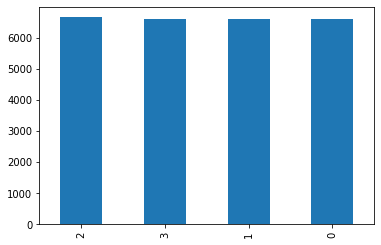

In [10]:
data['house_type'].value_counts().plot.bar()

Sau khi thực hiện upsampling với các `n_sample` phù hợp cho từng lớp khác nhau, quan sát trên biểu đồ lại, ta thấy số lượng các lớp trong thuộc tính giờ đã cân bằng hơn.

Hãy cùng xem lại độ tương quan giữa các thuộc tính, sau khi thực hiện up-sampling dữ liệu.

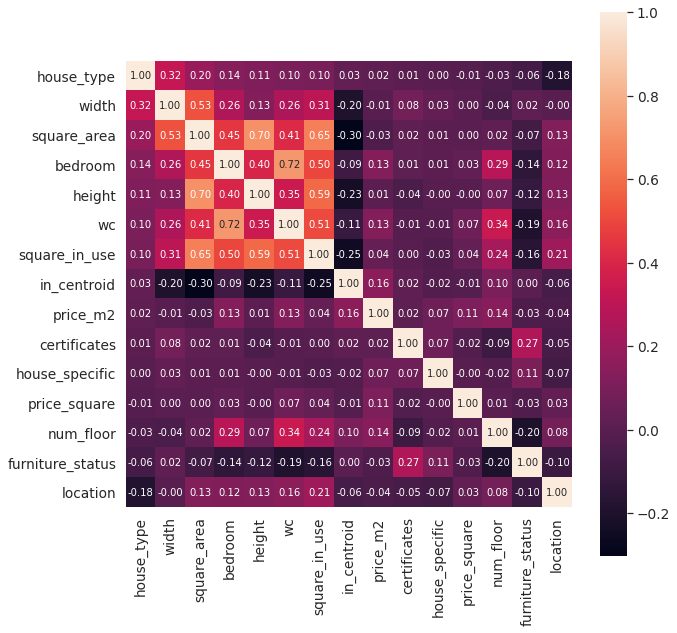

In [11]:
k = 15
corrmat = data.corr()
cols = corrmat.nlargest(k, 'house_type')['house_type'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

***Nhận xét:*** Rõ ràng so với bảng độ tương quan trước đấy (trừ những thuộc tính bị lệch đặc thù khá nhiều như `num_floor`, `location`,..), độ tương quan của các biến cùng với thuộc tính lớp `house_type` đã tăng nhiều.

# **3. Lựa chọn mô hình học.**

## 3.1. Chia dữ liệu train, test, validation.

Ta xác định các thuộc sẽ đưa vào để huấn luyện mô hình và thuộc tính dự đoán.  
Ở đây, chúng em sử dụng tất cả các thuộc tính đã được xử lý để làm đầu vào cho các mô hình (do nhận thấy các dữ liệu đều được xử lý khá tốt).

In [12]:
col_train=['furniture_status','price_m2','price_square','house_specific','width','height','bedroom','wc','square_area','square_in_use','certificates','num_floor','location','in_centroid']
label=['house_type']
obj_col=['furniture_status','house_specific','certificates','location','in_centroid']

for name in col_train:
    data[name]=data[name].astype(object)

In [13]:
for name in col_train:
    data_test[name]=data_test[name].astype(object)
    
x_test=data_test[col_train]
y_test=data_test['house_type']
    
x_test=pd.get_dummies(x_test)

<ipython-input-13-7ed8d5e65143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[name]=data_test[name].astype(object)


In [14]:
x=data[col_train]
y=data[label]

x=pd.get_dummies(x)
x.head()

,furniture_status_0,furniture_status_1,furniture_status_2,furniture_status_3,price_m2_0,price_m2_1,price_m2_2,price_m2_3,price_m2_4,price_square_0,...,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,in_centroid_0,in_centroid_1
4010,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4040,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10577,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10046,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Thực hiện chia dữ liệu thành các tập train, test và validation. Tuy nhiên ta đã dùng 1 tập dữ liệu ban đầu để làm test nên ta chỉ cần dùng tập validation để điều chỉnh tham số mô hình.

In [15]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train: ',len(x_train))
print('y_train: ',len(y_train))

print('x_val: ',len(x_val))
print('y_val: ',len(y_val))

x_train:  21171
y_train:  21171
x_val:  5293
y_val:  5293


## 3.2. Huấn luyện mô hình.

In [16]:
score_train=[]
score_val=[]

# ***Random Forest***

Mô hình đầu tiên được chọn là `Random Forest`.

Ta sẽ thực hiện huấn luyện mô hình trên tập train và ước lượng độ lỗi trong ngoài mẫu trên tập validation với đa tham số nhầm tìm ra tham số tối ưu nhất:
- Số lượng cây: thử với 50, 100, 500.
- Độ sâu tối đa mỗi cây: thử với [1:30].
- Độ đo sử dụng: thử với `gini` và `entropy`

In [17]:
Ein_50=[]
Eout_50=[]

Ein_100=[]
Eout_100=[]

Ein_500=[]
Eout_500=[]
count=1
total_loop=30

for i in range(1,31):
    print('INFO: {}/{} - Max depth={}.'.format(count,total_loop,i))
    
    random_for_50=RandomForestClassifier(max_depth=i,n_estimators=50)
    random_for_100=RandomForestClassifier(max_depth=i,n_estimators=100)
    random_for_500=RandomForestClassifier(max_depth=i,n_estimators=500)
    
    random_for_50.fit(x_train,y_train.values.ravel())
    random_for_100.fit(x_train,y_train.values.ravel())
    random_for_500.fit(x_train,y_train.values.ravel())
    
    Ein_50.append(random_for_50.score(x_train,y_train))
    Eout_50.append(random_for_50.score(x_val,y_val))
    Ein_100.append(random_for_100.score(x_train,y_train))
    Eout_100.append(random_for_100.score(x_val,y_val))
    Ein_500.append(random_for_500.score(x_train,y_train))
    Eout_500.append(random_for_500.score(x_val,y_val))
    
    print('n_estimators=50 \tE_in: {} \tE_out: {}'.format(random_for_50.score(x_train,y_train),random_for_50.score(x_val,y_val)))
    print('n_estimators=100 \tE_in: {} \tE_out: {}'.format(random_for_100.score(x_train,y_train),random_for_100.score(x_val,y_val)))
    print('n_estimators=500 \tE_in: {} \tE_out: {}'.format(random_for_500.score(x_train,y_train),random_for_500.score(x_val,y_val)))
    
    count+=1

INFO: 1/30 - Max depth=1.
n_estimators=50 	E_in: 0.5131610037332829 	E_out: 0.5084105084105084
n_estimators=100 	E_in: 0.5059307216105099 	E_out: 0.49990549990549993
n_estimators=500 	E_in: 0.5240300552903927 	E_out: 0.5172935172935172
INFO: 2/30 - Max depth=2.
n_estimators=50 	E_in: 0.5454373611833089 	E_out: 0.5388395388395388
n_estimators=100 	E_in: 0.5506356032323614 	E_out: 0.5492345492345493
n_estimators=500 	E_in: 0.5455791314210103 	E_out: 0.5403515403515403
INFO: 3/30 - Max depth=3.
n_estimators=50 	E_in: 0.5802655829119607 	E_out: 0.5734265734265734
n_estimators=100 	E_in: 0.5898587023297576 	E_out: 0.5862785862785863
n_estimators=500 	E_in: 0.597230754690232 	E_out: 0.5938385938385938
INFO: 4/30 - Max depth=4.
n_estimators=50 	E_in: 0.6173148716979349 	E_out: 0.6093366093366094
n_estimators=100 	E_in: 0.621189924861774 	E_out: 0.6165186165186165
n_estimators=500 	E_in: 0.6251594915174141 	E_out: 0.6178416178416178
INFO: 5/30 - Max depth=5.
n_estimators=50 	E_in: 0.6435423656

[]

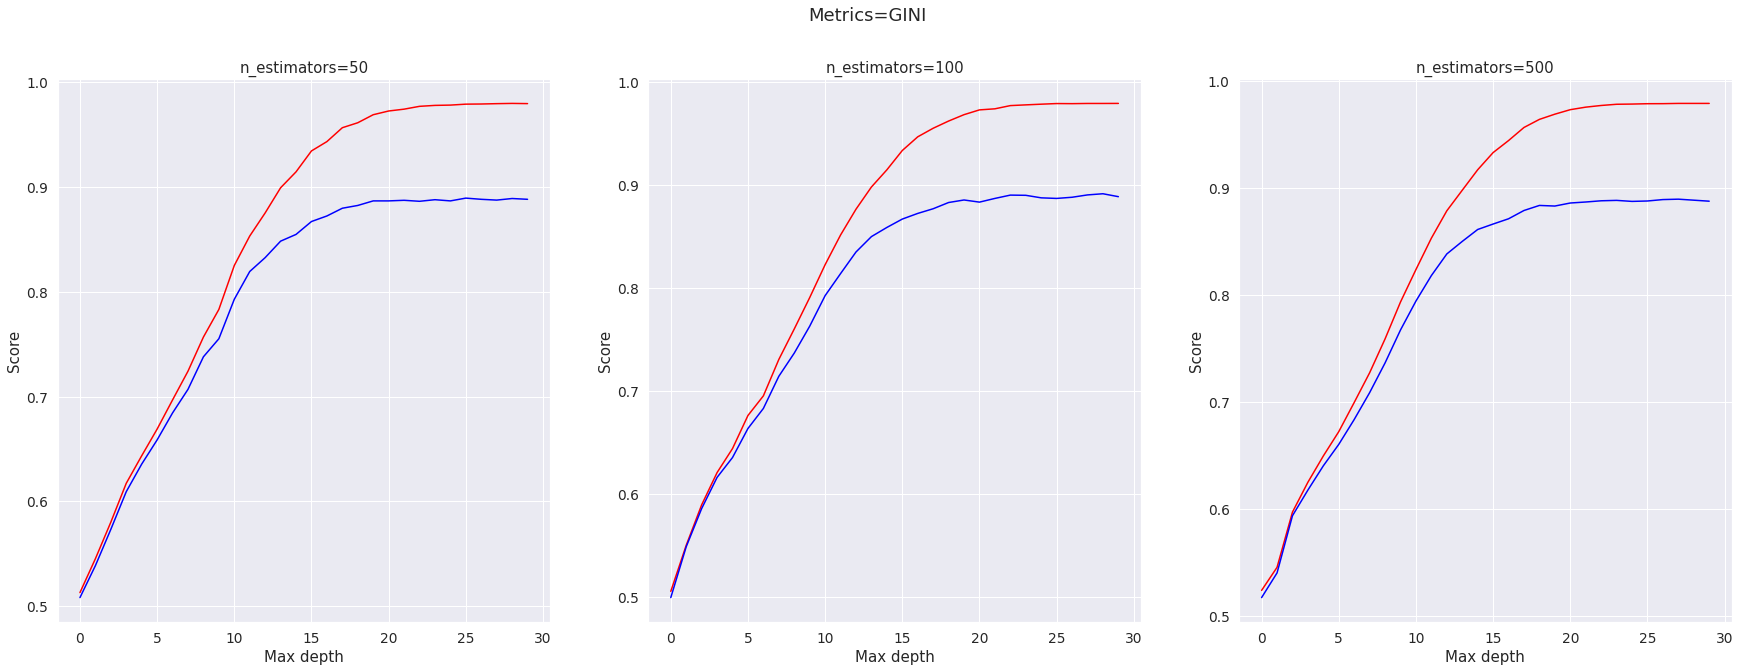

In [18]:
plt.figure(figsize=(30,10))
plt.suptitle('Metrics=GINI')

plt.subplot(131)
plt.title('n_estimators=50')
plt.plot(range(30),Ein_50,color='red')
plt.plot(range(30),Eout_50,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(132)
plt.title('n_estimators=100')
plt.plot(range(30),Ein_100,color='red')
plt.plot(range(30),Eout_100,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(133)
plt.title('n_estimators=500')
plt.plot(range(30),Ein_500,color='red')
plt.plot(range(30),Eout_500,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.plot()

In [19]:
Ein_50=[]
Eout_50=[]

Ein_100=[]
Eout_100=[]

Ein_500=[]
Eout_500=[]
count=1
total_loop=30

for i in range(1,31):
    print('INFO: {}/{} - Max depth={}.'.format(count,total_loop,i))
    
    random_for_50=RandomForestClassifier(max_depth=i,n_estimators=50,criterion='entropy')
    random_for_100=RandomForestClassifier(max_depth=i,n_estimators=100,criterion='entropy')
    random_for_500=RandomForestClassifier(max_depth=i,n_estimators=500,criterion='entropy')
    
    random_for_50.fit(x_train,y_train.values.ravel())
    random_for_100.fit(x_train,y_train.values.ravel())
    random_for_500.fit(x_train,y_train.values.ravel())
    
    Ein_50.append(random_for_50.score(x_train,y_train))
    Eout_50.append(random_for_50.score(x_val,y_val))
    Ein_100.append(random_for_100.score(x_train,y_train))
    Eout_100.append(random_for_100.score(x_val,y_val))
    Ein_500.append(random_for_500.score(x_train,y_train))
    Eout_500.append(random_for_500.score(x_val,y_val))
    
    print('n_estimators=50 \tE_in: {} \tE_out: {}'.format(random_for_50.score(x_train,y_train),random_for_50.score(x_val,y_val)))
    print('n_estimators=100 \tE_in: {} \tE_out: {}'.format(random_for_100.score(x_train,y_train),random_for_100.score(x_val,y_val)))
    print('n_estimators=500 \tE_in: {} \tE_out: {}'.format(random_for_500.score(x_train,y_train),random_for_500.score(x_val,y_val)))
    
    
    count+=1

INFO: 1/30 - Max depth=1.
n_estimators=50 	E_in: 0.5112234771513634 	E_out: 0.5046305046305046
n_estimators=100 	E_in: 0.5073956807334247 	E_out: 0.49536949536949537
n_estimators=500 	E_in: 0.5126411795283776 	E_out: 0.5033075033075033
INFO: 2/30 - Max depth=2.
n_estimators=50 	E_in: 0.5460516988800151 	E_out: 0.5343035343035343
n_estimators=100 	E_in: 0.554652426633902 	E_out: 0.5405405405405406
n_estimators=500 	E_in: 0.5522895893388782 	E_out: 0.5426195426195426
INFO: 3/30 - Max depth=3.
n_estimators=50 	E_in: 0.5773829214120315 	E_out: 0.5734265734265734
n_estimators=100 	E_in: 0.5693020178630499 	E_out: 0.5592515592515592
n_estimators=500 	E_in: 0.5866452436085251 	E_out: 0.5796635796635796
INFO: 4/30 - Max depth=4.
n_estimators=50 	E_in: 0.6123056566324843 	E_out: 0.6038556038556039
n_estimators=100 	E_in: 0.626435423656727 	E_out: 0.6204876204876205
n_estimators=500 	E_in: 0.6227493974764897 	E_out: 0.618030618030618
INFO: 5/30 - Max depth=5.
n_estimators=50 	E_in: 0.64396767638

[]

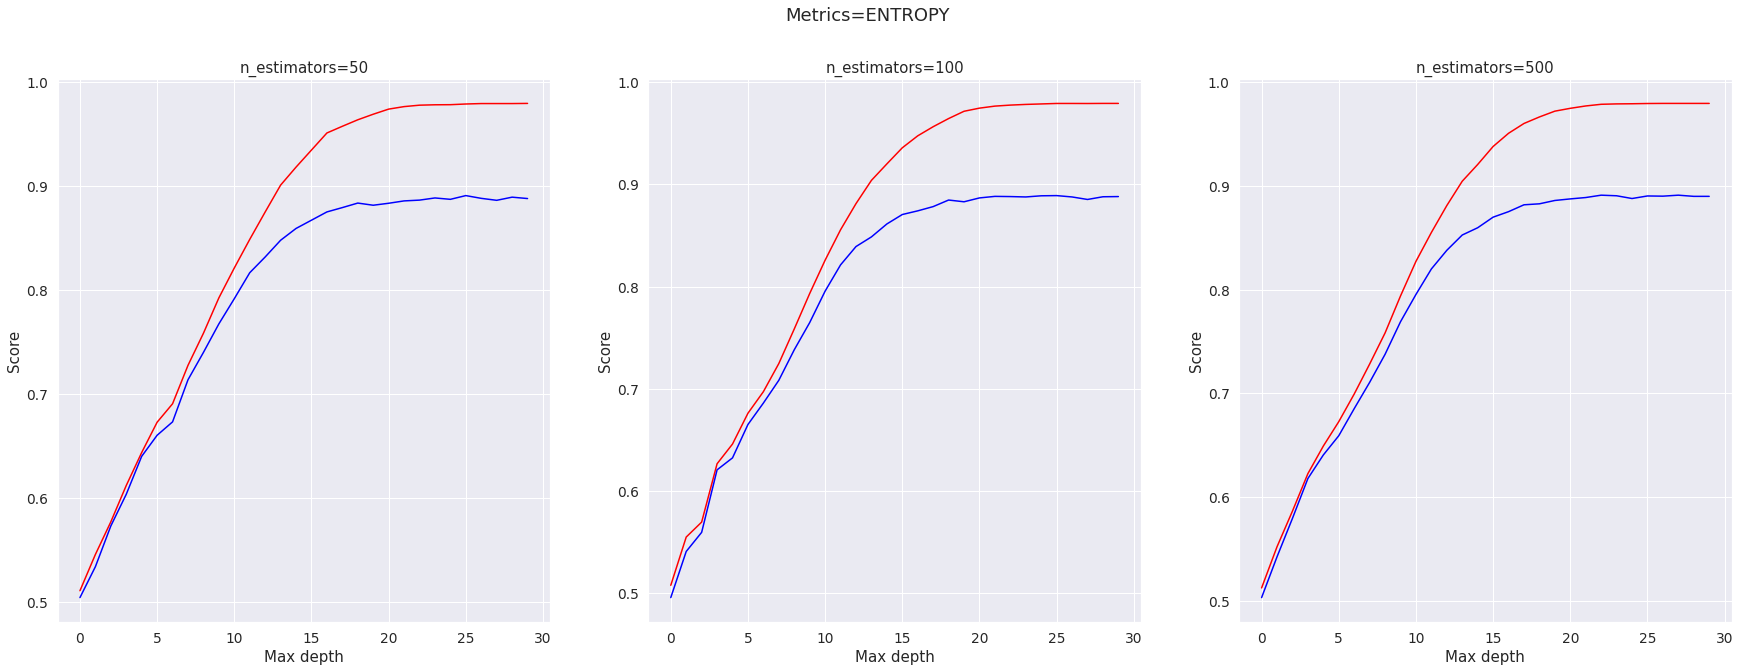

In [20]:
plt.figure(figsize=(30,10))
plt.suptitle('Metrics=ENTROPY')

plt.subplot(131)
plt.title('n_estimators=50')
plt.plot(range(30),Ein_50,color='red')
plt.plot(range(30),Eout_50,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(132)
plt.title('n_estimators=100')
plt.plot(range(30),Ein_100,color='red')
plt.plot(range(30),Eout_100,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')

plt.subplot(133)
plt.title('n_estimators=500')
plt.plot(range(30),Ein_500,color='red')
plt.plot(range(30),Eout_500,color='blue')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.plot()

In [17]:
rf=RandomForestClassifier(criterion='entropy',max_depth=24,n_estimators=500)
rf.fit(x_train,y_train.values.ravel())
score_train.append(rf.score(x_train,y_train))
score_val.append(rf.score(x_val,y_val))

# ***Support Vector Machine***

Thử nghiệm tiếp với mô hình Support Vector Machine trên 2 kernel:
- Linear (tuyến tính): điều chỉnh siêu tham số phạt C để điều chỉnh soft-margin.
- RBF: điều chỉnh 2 tham số bao gồm C và bán kính Gaussian (Gamma).

In [19]:
pC_linear=[0.001,0.01,0.1,1,10,100]
pC=[0.01,0.1,1,10,100]
gamma=[0.01,0.1,1,10,100]

Đầu tiên ta thử nghiệm với ***linear kernel***.

In [ ]:
Ein=[]
Eout=[]

for c in pC_linear:
    svc_linear=SVC(kernel='linear',C=c)
    svc_linear.fit(x_train,y_train.values.ravel())
    Ein.append(svc_linear.score(x_train,y_train))
    Eout.append(svc_linear.score(x_val,y_val))
    
    print('C={}  \tE_in:{} \tE_out:{}'.format(c,svc_linear.score(x_train,y_train),svc_linear.score(x_val,y_val)))

C=0.001  	E_in:0.6317281791975805 	E_out:0.628992628992629
C=0.01  	E_in:0.6722272104342895 	E_out:0.6705726705726706
C=0.1  	E_in:0.6955720429091253 	E_out:0.6915516915516916
C=1  	E_in:0.6990217853598601 	E_out:0.6934416934416935
C=10  	E_in:0.7000614337696707 	E_out:0.694008694008694
C=100  	E_in:0.6997306365483673 	E_out:0.6936306936306936


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(Ein,color='blue')
plt.plot(Eout,color='red')
plt.title('Linear Kernel')
plt.xlabel('C')
plt.ylabel('Score')

In [20]:
Ein=[]
Eout=[]

for c in pC:
    for g in gamma:
        svc_linear=SVC(kernel='rbf',C=c,gamma=g)
        svc_linear.fit(x_train,y_train.values.ravel())
        Ein.append(svc_linear.score(x_train,y_train))
        Eout.append(svc_linear.score(x_val,y_val))

        print('C={}\tgamma={} \t\tE_in:{}  \t\tE_out:{}'.format(c,g,svc_linear.score(x_train,y_train),svc_linear.score(x_val,y_val)))

C=0.01	gamma=0.01 		E_in:0.5828255632705116  		E_out:0.5665973927829209
C=0.01	gamma=0.1 		E_in:0.6286901894100421  		E_out:0.614396372567542
C=0.01	gamma=1 		E_in:0.25374332813754663  		E_out:0.24409597581711695
C=0.01	gamma=10 		E_in:0.25374332813754663  		E_out:0.24409597581711695
C=0.01	gamma=100 		E_in:0.25374332813754663  		E_out:0.24409597581711695
C=0.1	gamma=0.01 		E_in:0.6568419063813707  		E_out:0.6427356886453807
C=0.1	gamma=0.1 		E_in:0.7365736148505031  		E_out:0.7149064802569431
C=0.1	gamma=1 		E_in:0.639837513579897  		E_out:0.5641413187228415
C=0.1	gamma=10 		E_in:0.5208539983940296  		E_out:0.45229548460230495
C=0.1	gamma=100 		E_in:0.5208539983940296  		E_out:0.45229548460230495
C=1	gamma=0.01 		E_in:0.6957158377025175  		E_out:0.678821084451162
C=1	gamma=0.1 		E_in:0.8554154267630248  		E_out:0.8220290950311733
C=1	gamma=1 		E_in:0.9797364319115771  		E_out:0.8851313054978274
C=1	gamma=10 		E_in:0.9797364319115771  		E_out:0.7880219157377668
C=1	gamma=100 		E_in:0.9

In [26]:
svc=SVC(C=10,gamma=0.1,kernel='rbf')
svc.fit(x_train,y_train.values.ravel())
score_train.append(svc.score(x_train,y_train))
score_val.append(svc.score(x_val,y_val))

# ***Decision Tree***

Mô hình cuối cùng được chọn là Cây quyết định, ta sẽ điều chỉnh tham số với độ sâu tối đa (`max_depth`) từ 1:100.

In [ ]:
score=[]
for i in range(1,100):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train.values.ravel())
    score.append([model.score(x_train,y_train),model.score(x_val,y_val)])
    
    print('Max depth: {} \tEin: {} \tEout: {}'.format(i,model.score(x_train,y_train),model.score(x_val,y_val)))

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(score)
plt.title('Decision Tree')
plt.xlabel('Max depth')
plt.ylabel('Score')

In [27]:
decision=DecisionTreeClassifier(max_depth=28)
decision.fit(x_train,y_train.values.ravel())
score_train.append(decision.score(x_train,y_train))
score_val.append(decision.score(x_val,y_val))

In [28]:
data=np.array([score_train,score_val])

Text(0.5, 0, 'Model')

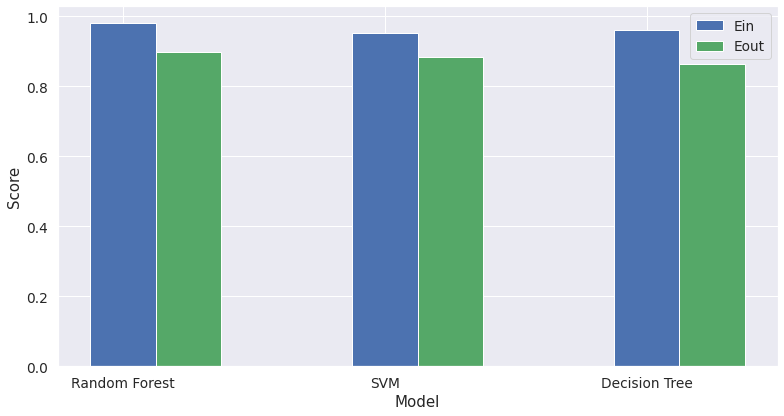

In [44]:
X = np.arange(3)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)

ax.legend(labels=['Ein', 'Eout'])
ax.set_xticks(X)
ax.set_xticklabels(['Random Forest','SVM','Decision Tree'])
plt.ylabel('Score')
plt.xlabel('Model')

### ***Đánh giá trên tập kiểm thử.***

Theo quan sát có được, ta có thể thấy mô hình cho kết quả tốt nhất trên cả tập train và validation là Random Forest, do đó ta sẽ dùng mô hình này để dự đoán cho tập test.

Huấn luyện lại mô hình với tham số tối ưu trên toàn bộ dữ liệu được upsampling.

In [45]:
our_model=RandomForestClassifier(criterion='entropy',max_depth=24,n_estimators=500)
our_model.fit(x,y.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=500)

In [49]:
our_model.score(x,y),our_model.score(x_test,y_test)

(0.9786124546553809, 0.7704343134610196)

***Nhận xét:***
- Mô hình đưa ra có thể dự đoán được ở mức khá tốt với dữ liệu đã upsampling, nguyên nhân do các dòng dữ liệu được nhân lên chia train test thì khả năng các dòng dữ liệu trong train và test sẽ có giống nhau, vì thế mô hình sẽ trả lời tốt hơn.
- Tuy nhiên với dữ liệu ban đầu ta tách ra để riêng dành cho quá trình kiểm thử cuối cùng, điểm số được đánh giá không cao như so với tập validation đã kiểm thử. Điều này có thể dễ suy đoán ra được cho dữ liệu ban đầu tách ra là 1 tập hoàn toàn mới so với dữ liệu cũ là hoàn toàn không tồn tại các dòng dữ liệu trùng lắp với các dòng trong tập huấn luyện, do đó, hiệu suất của mô hình giảm đi (nhưng không phải quá thấp mặc dù chưa gọi là cao khi đạt 0.77 so với validation đạt được 0.89 và tập huấn luyện đạt được xấp xỉ 0.98).
- Nguyên nhân gây ra việc này có thể được định nghĩa từ trước, là do trong quá trình thu thập dữ liệu, sự mất cân bằng dữ liệu giữa các lớp đã gây ra, các lớp chứa ít dòng dữ liệu sẽ thiếu thông tin cho mô hình tổng quát hóa được tốt như các lớp có nhiều dữ liệu hơn.